#**Part 1: Importing appropriate packages and the data set**
Every data analysis project starts with importing packages and data set, after which a data wrangling process should be performed to make the set good enough to examine. Below come these steps.


In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
import io
from google.colab import files

In [ ]:
# Upload the file to the dock
uploaded = files.upload()

Saving Exploratory Data.csv to Exploratory Data.csv


In [ ]:
# Explore the selected data set somewhat before raising corresponding questions
df = pd.read_csv(io.BytesIO(uploaded['Exploratory Data.csv'])) 
df.head(5)

PatientId  AppointmentID Gender  ... Handcap SMS_received  No-show
0  2.987250e+13        5642903      F  ...       0            0       No
1  5.589978e+14        5642503      M  ...       0            0       No
2  4.262962e+12        5642549      F  ...       0            0       No
3  8.679512e+11        5642828      F  ...       0            0       No
4  8.841186e+12        5642494      F  ...       0            0       No

[5 rows x 14 columns]

In [ ]:
# Now let's look at some detail of the data set
# The column number and non-null number are all 110527 - implying that there are
# no NaN entries in this data set
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

In [ ]:
# Clean up duplicate columns - 0 implies that we have removed all the duplicates
df.drop_duplicates()
sum(df.duplicated())

0

#**Part 2: Raising questions and investigating**
Now - after taking a glimpse of and cleaning the data set - it's time to raise a few topics that help us learn this set more thoroughly. Based on the data types stored in this set, I have raised these following questions: 

1.   the relationship between "Gender" and "No-show"
2.   the relationship between "AppointmentDay" and "No-show" 
3.   the relationship between "Age" and "No-show"
4.   the relationship between "Neighbourhood" and "No-show"
5.   the relationship between "Age" and "Gender" with "Alcoholism" and "Hipertension"

And now let's begin!

###2.1 The relationship between "Gender" and "No-show"###

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Gender Distribution')

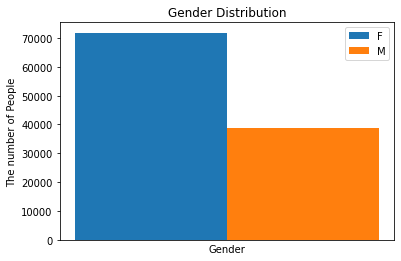

In [ ]:
# First, let's take a look at how gender distributes -- and as we can see, 
# the number of females is nearly twice as that of males
genders = df.Gender.unique()
genderDistributionPlot = plt.hist([df.loc[df.Gender == x, 'Gender'] for x in genders], label = genders, bins = 1)
plt.xlabel('Gender')
plt.ylabel('The number of People', rotation = 90)
plt.legend(genders, loc='upper right');
plt.title('Gender Distribution')

In [ ]:
# Then, let's split the data set into two groups, one of which contains only man
# while another contains only woman, and see the No-show condition of each set
df_females = df[df['Gender'] == 'F']
df_males = df[df['Gender'] == 'M']
NoShow = df['No-show'].unique()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Whether a female shows up in a appointment')

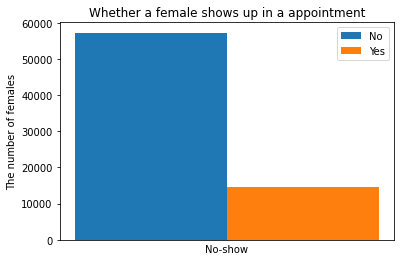

In [ ]:
# Take a look at the No-show condition of woman's group - as we can see, the number
# of women that did not show up (whose No-show status is 'No') is nearly four times
# the number of women that showed
femaleNoShowCondition = plt.hist([df_females.loc[df_females['No-show'] == x, 'No-show'] for x in NoShow], label = NoShow, bins = 1)
plt.xlabel('No-show')
plt.ylabel('The number of females', rotation = 90)
plt.legend(NoShow, loc='upper right');
plt.title("Whether a female shows up in a appointment")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Whether a male shows up in a appointment')

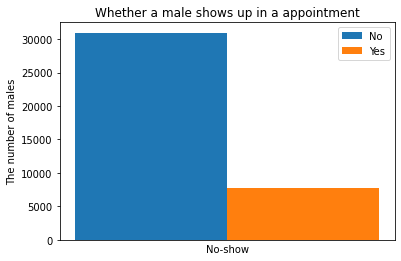

In [ ]:
# Then take a look at the No-show condition of man's group - as we can see, the number
# of men that did not show up (whose No-show status is 'No') is also nearly four times
# the number of men that showed up
maleNoShowCondition = plt.hist([df_males.loc[df_males['No-show'] == x, 'No-show'] for x in NoShow], label = NoShow, bins = 1)
plt.xlabel('No-show')
plt.ylabel('The number of males', rotation = 90)
plt.legend(NoShow, loc='upper right');
plt.title("Whether a male shows up in a appointment")

Since the number of individuals that did not show up is about four times the number of those that showed up both for females and males, we can conclude that there did not exist a strong correlation between "Gender" and "No-show"

###2.2 The relationship between "AppointmentDay" and "No-show"###

In [ ]:
# Now, before examing the relationship between "AppointmentDay" and "No-show",
# let's first take a look at the distribution of appointment day in the data set
appointmentDayDistributionPlot = df['AppointmentDay'].hist(figsize = (200, 200), bins = 50)
appointmentDayDistributionPlot.set_xlabel('AppointmentDay', fontsize = 100, labelpad = 30)
appointmentDayDistributionPlot.set_ylabel('The number of people appointed', rotation = 90, fontsize = 100, labelpad = 220)
plt.xticks(fontsize = 80, rotation = 45, ha = 'right')
plt.yticks(fontsize = 80)
appointmentDayDistributionPlot.set_title('The number of people appointed on each day from 2016/04/29 to 2016/06/08')

Text(0.5, 1.0, 'The number of people appointed on each day from 2016/04/29 to 2016/06/08')

As we can see, except for some exceptional days (e.g. 2016-05-14, the number of people appointed does not vary a lot across different days)

Text(0, 0.5, 'The average of show-up indicator (1 for Yes, 0 for No)')

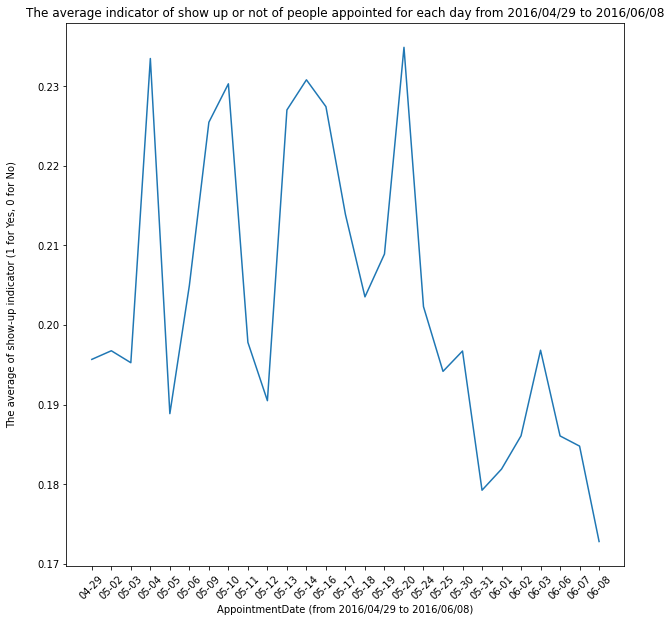

In [ ]:
# Now, let's examine the relationship between "AppointmentDay" and "No-show" by identifying
# the average of No-show indicator (1 for Yes, 0 for No) of people appointed in different days
# Use (0, 1) instead of (No, Yes) for graphing
df["No-show"].replace(('No', 'Yes'), (0, 1), inplace = True)

# Create a appointmentDay list
appointmentDay = ['04-29']

for i in range(31):
    if (i != 0 and i != 6 and i != 7 and i != 14 and i != 20 and i != 21 and i != 22 and 
        i != 25 and i != 26 and i != 27 and i != 28):
        if (i < 9):
            appointmentDay.append("05-0" + str(i + 1))
        else:
            appointmentDay.append("05-" + str(i + 1))
            
for i in range(8):
    if (i != 3 and i != 4):
            appointmentDay.append("06-0" + str(i + 1))

# Plot the average of No-show indicator (1 for Yes, 0 for No) of people 
# appointed in different days
fig = plt.figure(figsize=(10, 10))
appointmentDayWithNoShow = plt.plot(appointmentDay, df.groupby(['AppointmentDay'])['No-show'].mean())
plt.title('The average indicator of show up or not of people appointed for each day from 2016/04/29 to 2016/06/08')
plt.xlabel('AppointmentDate (from 2016/04/29 to 2016/06/08)')
plt.xticks(rotation = 45)
plt.ylabel('The average of show-up indicator (1 for Yes, 0 for No)',rotation = 90, labelpad = 20)

As we can see, during 05/03 - 05/04, 05/13-05/18, and 05/20-05/24, people had the highest possibility of showing up in their appointment (since during these days, the average indicator of No-show is larger than other days)

###2.3 The relationship between "Age" and "No-show"###

In [ ]:
# Let's first explore the age date
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [ ]:
# Drop the person with age -1 (violating reality!!!)
df = df[df['Age'] != -1]
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age distribution')

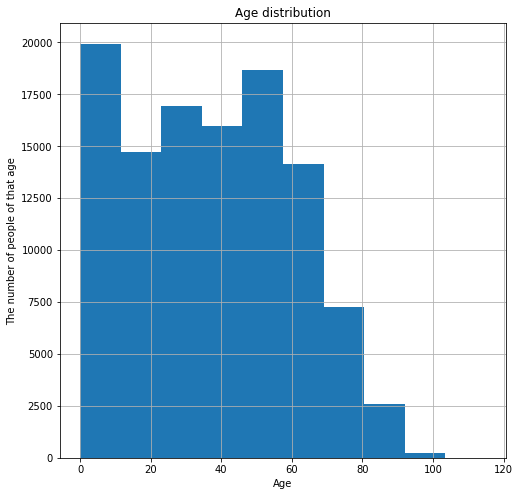

In [ ]:
# Before examing the relationship between "Age" and "No-show",
# let's take a look at how age distributes in this data set
AgeDistributionPlot = df['Age'].hist(figsize = (8, 8))
AgeDistributionPlot.set_xlabel('Age')
AgeDistributionPlot.set_ylabel('The number of people of that age')
AgeDistributionPlot.set_title('Age distribution')

As we can see, the age distribution is relatively balanced - except there were a lot fewer people above 60 years old than those from other age groups

Text(0, 0.5, 'The average of show-up indicator (1 for Yes, 0 for No)')

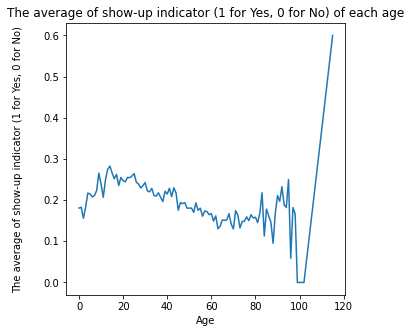

In [ ]:
# Now, let's examine the relationship between "Age" and "No-show" by identifying 
# the average of show-up indicator (1 for Yes, 0 for No) of people of different age
ageLabels = []

for i in df.Age:
    if i not in ageLabels:
        ageLabels.append(i)
        
ageLabels.sort()

fig = plt.figure(figsize=(5, 5))
AgeWithNoShow = plt.plot(ageLabels, df.groupby(['Age'])['No-show'].mean())
plt.title('The average of show-up indicator (1 for Yes, 0 for No) of each age')
plt.xlabel('Age')
plt.ylabel('The average of show-up indicator (1 for Yes, 0 for No)', rotation = 90, labelpad = 20)

As we can see, people between age 0 to 40 generally had a higher possibility of showing up (indicated by a higher No-show average) than those from other age groups

In [ ]:
# Now, let's split the data according to the 4 age groups,
# and examine the No-show rate correspondingly
AgeGroup1 = df[df['Age'] <= 18]
AgeGroup2 = df[(18 < df['Age']) & (df['Age'] <= 37)]
AgeGroup3 = df[(37 < df['Age']) & (df['Age'] <= 55)]
AgeGroup4 = df[(55 < df['Age']) & (df['Age'] <= 115)]

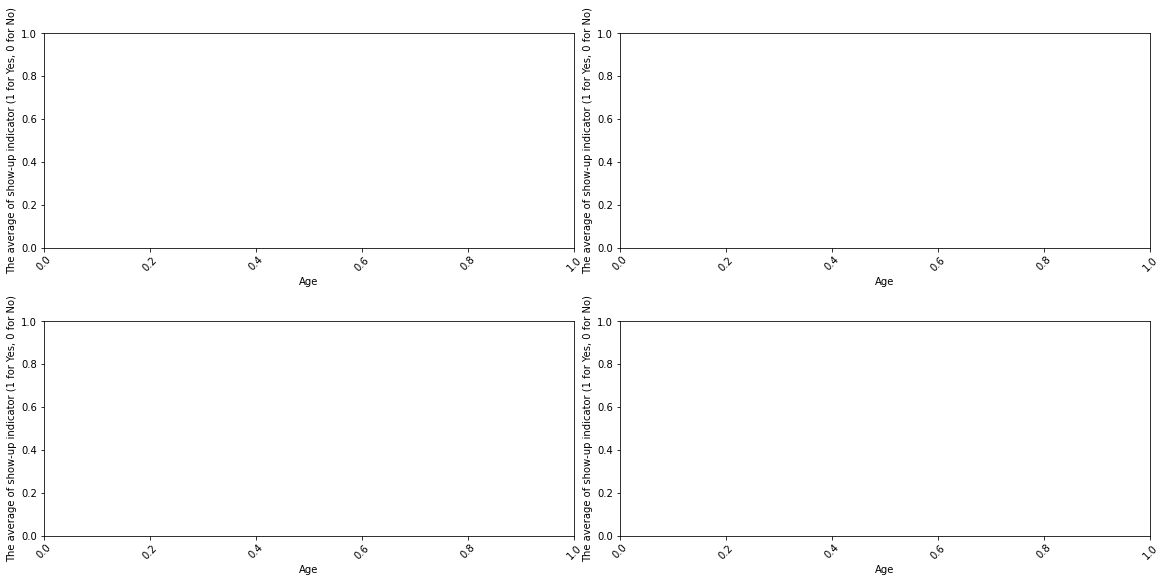

In [ ]:
# Create a plots composed of four subplots, each of which takes charge of
# one age group
ageGroups = plt.figure(figsize = (16, 8))

ax1 = ageGroups.add_subplot(2, 2, 1)
plt.xlabel("Age")
plt.xticks(rotation = 45)
plt.ylabel("The average of show-up indicator (1 for Yes, 0 for No)", rotation = 90)

ax2 = ageGroups.add_subplot(2, 2, 2)
plt.xlabel("Age")
plt.xticks(rotation = 45)
plt.ylabel("The average of show-up indicator (1 for Yes, 0 for No)", rotation = 90)

ax3 = ageGroups.add_subplot(2, 2, 3)
plt.xlabel("Age")
plt.xticks(rotation = 45)
plt.ylabel("The average of show-up indicator (1 for Yes, 0 for No)", rotation = 90)

ax4 = ageGroups.add_subplot(2, 2, 4)
plt.xlabel("Age")
plt.xticks(rotation = 45)
plt.ylabel("The average of show-up indicator (1 for Yes, 0 for No)", rotation = 90)

ageGroups.tight_layout(pad = 0)

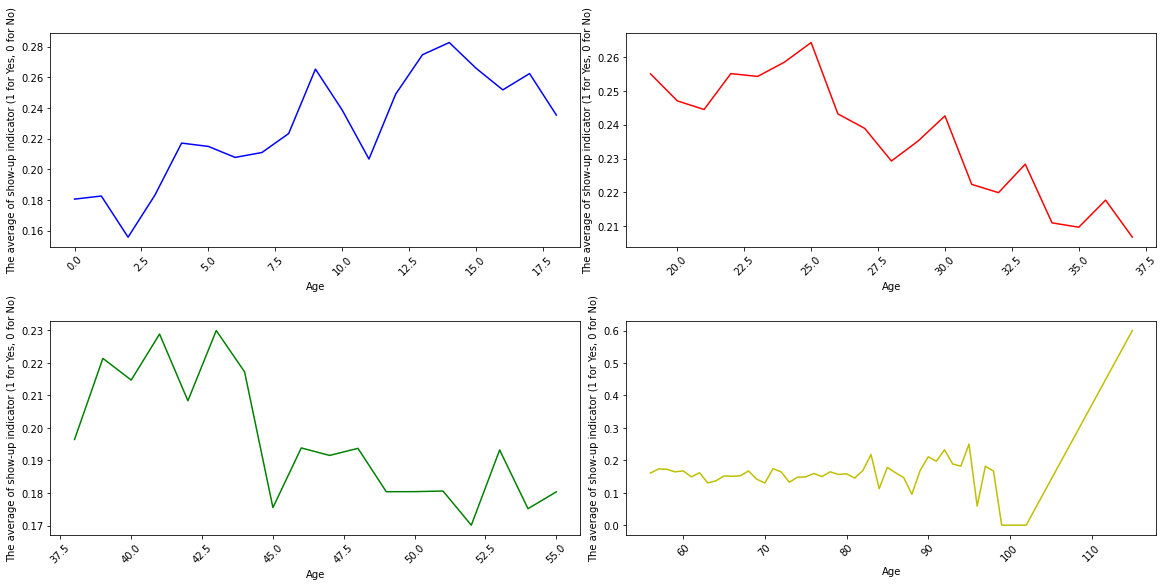

In [ ]:
# # Now, let's identify the average of show-up indicator (1 for Yes, 0 for No) 
# of people of different age groups
ageLabelsOfGroup1 = []

for i in AgeGroup1.Age:
    if i not in ageLabelsOfGroup1:
        ageLabelsOfGroup1.append(i)
        
ageLabelsOfGroup1.sort()

ageLabelsOfGroup2 = []

for i in AgeGroup2.Age:
    if i not in ageLabelsOfGroup2:
        ageLabelsOfGroup2.append(i)
        
ageLabelsOfGroup2.sort()

ageLabelsOfGroup3 = []

for i in AgeGroup3.Age:
    if i not in ageLabelsOfGroup3:
        ageLabelsOfGroup3.append(i)
        
ageLabelsOfGroup3.sort()

ageLabelsOfGroup4 = []

for i in AgeGroup4.Age:
    if i not in ageLabelsOfGroup4:
        ageLabelsOfGroup4.append(i)
        
ageLabelsOfGroup4.sort()

ax1.plot(ageLabelsOfGroup1, AgeGroup1.groupby(['Age'])['No-show'].mean(), color = 'b')
ax2.plot(ageLabelsOfGroup2, AgeGroup2.groupby(['Age'])['No-show'].mean(), color = 'r')
ax3.plot(ageLabelsOfGroup3, AgeGroup3.groupby(['Age'])['No-show'].mean(), color = 'g')
ax4.plot(ageLabelsOfGroup4, AgeGroup4.groupby(['Age'])['No-show'].mean(), color = 'y')
ageGroups

From above, we can conclude that for people between 0 to 18, one's age and his / her possibility of showing up (indicated by the average of show-up indicator) has a positive correlation with their age, while this trend reverses for people between 19 to 37. For to other age groups, there is no strong correlation between one's age and his / her possibility of showing up

###2.4 The relationship between "Neighbourhood" and "No-show"###

In [ ]:
# Before examing the relationship between "Neighbourhood" and "No-show",
# let's first take a look at how different neighbourhood distributes in this data set
differentNeighbourhood = df['Neighbourhood'].hist(figsize = (200, 60), bins = 50)
plt.xlabel('Different neighbourhood', fontsize = 100)
plt.xticks(fontsize = 80, rotation = 45, ha = 'right')
plt.ylabel('The number of people with that neighbourhood', fontsize = 100, rotation = 90, labelpad = 220)
plt.yticks(fontsize = 80)
plt.title('The distribution of different neighbourhood people had', fontsize = 100)

Text(0.5, 1.0, 'The distribution of different neighbourhood people had')

As we can see, the number of people with different neighborhood varies greatly - as their are some neighborhood with many more people than others (such as Maria Ortiz) while there are some with many fewer (such as Sao Jose)

In [ ]:
# Now, let's examine the relationship between "Neighbourhood" and "No-show" by identifying
# the average of show-up indicator (1 for Yes, 0 for No) of people with different neighbourhood
neighorboodLabels = []

for i in df.Neighbourhood:
    if i not in neighorboodLabels:
        neighorboodLabels.append(i)
        
neighorboodLabels.sort()

fig = plt.figure(figsize=(200, 200))
neighbourhoodWithNoShow = plt.plot(neighorboodLabels, df.groupby(['Neighbourhood'])['No-show'].mean(), color = 'r')
plt.xlabel('Different neighbourhood', fontsize = 100, labelpad = 220)
plt.xticks(fontsize = 100, rotation = 45, ha = 'right')
plt.ylabel('The average of show-up indicator (1 for Yes, 0 for No)', fontsize = 100, rotation = 90, labelpad = 220)
plt.yticks(fontsize = 100)
plt.title('The average of show-up indicator (1 for Yes, 0 for No) of people with different neighbourhood', fontsize = 100)

Text(0.5, 1.0, 'The average of show-up indicator (1 for Yes, 0 for No) of people with different neighbourhood')

As we can see from above - people with different neighborhood had different possibility of showing-up those with neighborhood SANTA MARTHA had the lowest No-show up mean, while those with SANTA had the highest


###2.5 The relationship between "Age" and "Gender" with "Alcoholism" and "Hipertension"###

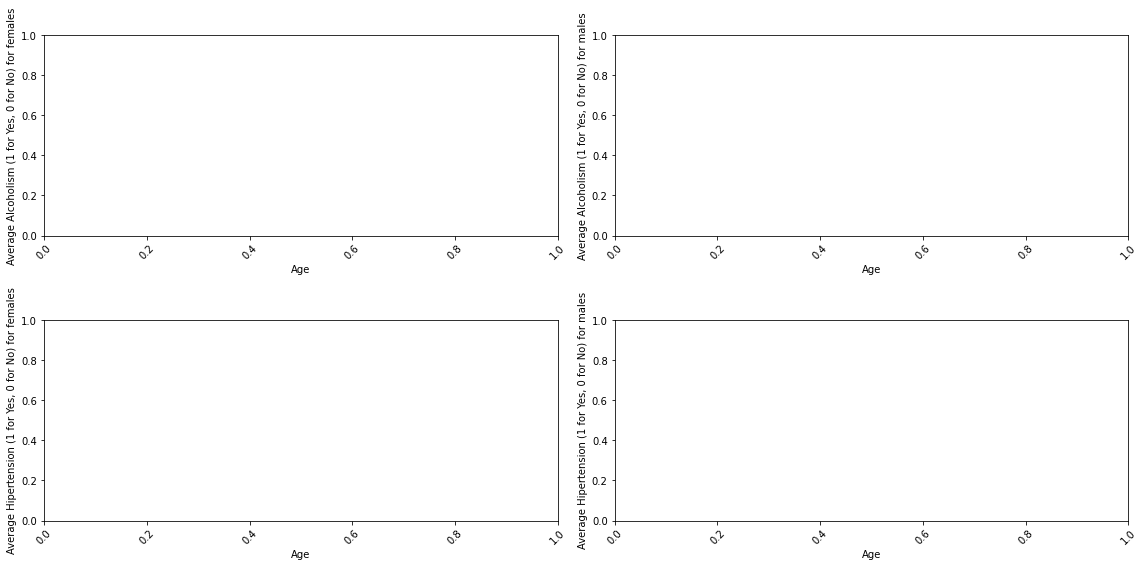

In [ ]:
# First, let's create a plots composed of four subplots, each of which measures
# the relationship between "Age" with "Alcoholism" and "Age" with "Hipertension"
# for both females and males correspondingly

finalFig = plt.figure(figsize = (16, 8))

ax1 = finalFig.add_subplot(2, 2, 1)
plt.xlabel("Age")
plt.xticks(rotation = 45)
plt.ylabel("Average Alcoholism (1 for Yes, 0 for No) for females", rotation = 90)

ax2 = finalFig.add_subplot(2, 2, 2)
plt.xlabel("Age")
plt.xticks(rotation = 45)
plt.ylabel("Average Alcoholism (1 for Yes, 0 for No) for males", rotation = 90)

ax3 = finalFig.add_subplot(2, 2, 3)
plt.xlabel("Age")
plt.xticks(rotation = 45)
plt.ylabel("Average Hipertension (1 for Yes, 0 for No) for females", rotation = 90)

ax4 = finalFig.add_subplot(2, 2, 4)
plt.xlabel("Age")
plt.xticks(rotation = 45)
plt.ylabel("Average Hipertension (1 for Yes, 0 for No) for males", rotation = 90)

plt.tight_layout()

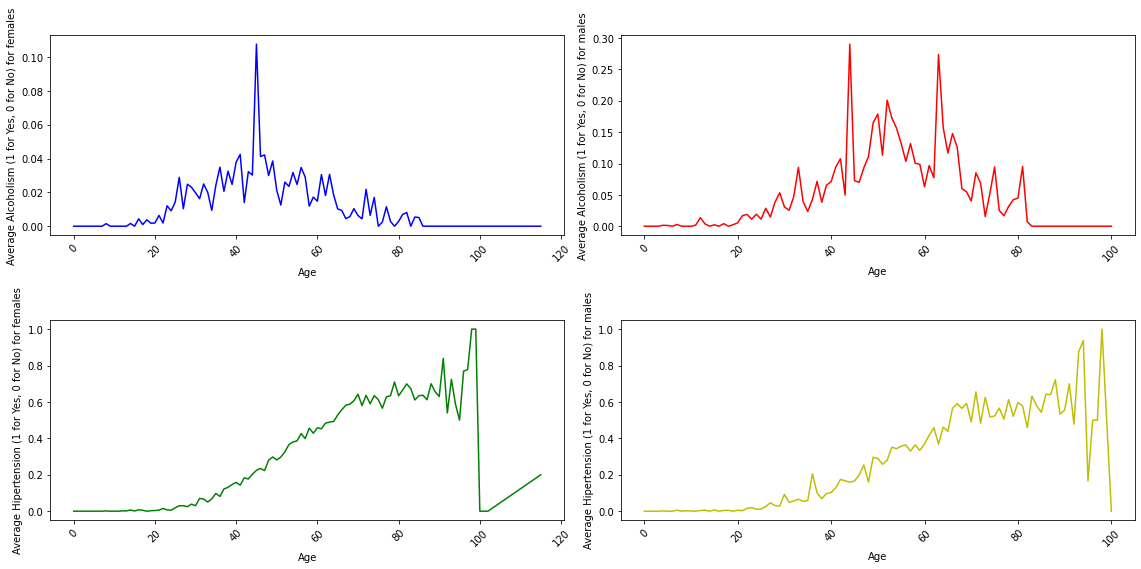

In [ ]:
# Now, let's examine the relationship between "Age" with "Alcoholism" and "Age" with "Hipertension"
# by identifying the average Alcoholism and Hipertension (1 for Yes, 0 for No) for females and males
df_females = df_females[df_females['Age'] != -1]
df_males = df_males[df_males['Age'] != -1] 

ageLabelsFemales = []

for i in df_females.Age:
    if i not in ageLabelsFemales:
        ageLabelsFemales.append(i)
        
ageLabelsFemales.sort()

ageLabelsMales = []

for i in df_males.Age:
    if i not in ageLabelsMales:
        ageLabelsMales.append(i)
        
ageLabelsMales.sort()

ax1.plot(ageLabelsFemales, df_females.groupby(['Age'])['Alcoholism'].mean(), color = 'b')
ax2.plot(ageLabelsMales, df_males.groupby(['Age'])['Alcoholism'].mean(), color = 'r')
ax3.plot(ageLabelsFemales, df_females.groupby(['Age'])['Hipertension'].mean(), color = 'g')
ax4.plot(ageLabelsMales, df_males.groupby(['Age'])['Hipertension'].mean(), color = 'y')

finalFig

As we can see, for females between 20 to 50, alcoholism becomes more popular (with a larger average) with the increase of age, while the trend reverses for those between 50 to 80; males alcoholism shows a similar trend, but they in addition shows a higher tendency toward alcoholism than females. The possibility of getting hipertension increases as age increases both for males and females, implying that there might not be a strong relationship between alcoholism and hipertension